In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Titanic.csv')

df.describe()

,Index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,FareNormalized
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,0.352413,29.361582,0.523008,0.381594,32.204208,1.904602,0.602694,0.062858
std,257.353842,257.353842,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,1.613459,0.489615,0.096995
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,0.015440
50%,445.000000,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000,1.000000,0.028213
75%,667.500000,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000,0.060508
max,890.000000,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,11.000000,1.000000,1.000000


In [2]:


#cleaning and preprocessing
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())



In [3]:
X = df[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone' ]]
y = df['Survived']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=300)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,300
,multi_class,'deprecated'


In [6]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))


Accuracy: 0.7988826815642458
Precision: 0.7794117647058824
Recall: 0.7162162162162162


In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=7,
    random_state=42
)
model.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,7
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

preds = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))


Accuracy: 0.8044692737430168
Precision: 0.8095238095238095
Recall: 0.6891891891891891


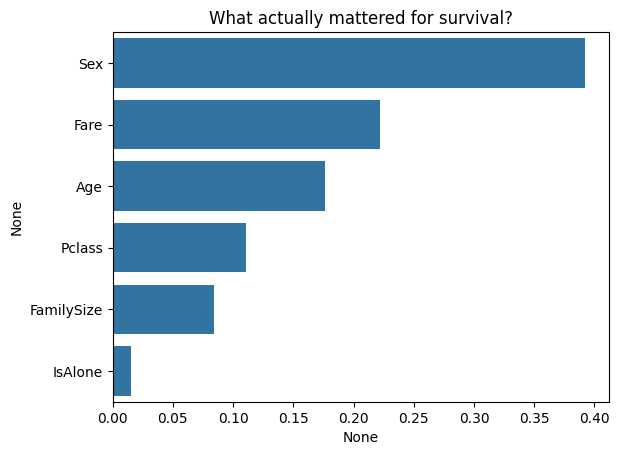

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt

main_feautres = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(x=main_feautres, y=main_feautres.index)
plt.title("What actually mattered for survival?")
plt.show()